In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
from numpy.random import randn
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import rrcf
from collections import defaultdict

# Standard Deviation

In [19]:
# number of characters' lines in episodes of ds9 are strongly right skewed
# data source: https://github.com/gmorinan/trekviz/
ds9 = pd.read_csv("data/ds9.csv")

In [20]:
ds9.head()

,Character,BASHIR,DAMAR,DAX,DUKAT,EZRI,GARAK,JAKE,KEIKO,KIRA,...,ROM,SISKO,WEYOUN,WINN,WORF,ZEK,lines,ep,season,title
0,BASHIR,0,0,4,0,0,0,0,0,13,...,0,3,0,0,0,0,17,0,1,Emissary (parts 1 & 2)
1,DAX,4,0,2,0,0,0,0,0,12,...,0,49,0,0,0,0,51,0,1,Emissary (parts 1 & 2)
2,DUKAT,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,5,0,1,Emissary (parts 1 & 2)
3,JAKE,0,0,0,0,0,0,0,0,0,...,0,27,0,0,0,0,20,0,1,Emissary (parts 1 & 2)
4,KIRA,13,0,12,0,0,0,0,0,12,...,0,20,0,0,0,0,64,0,1,Emissary (parts 1 & 2)


In [21]:
ds9.shape

(1542, 25)

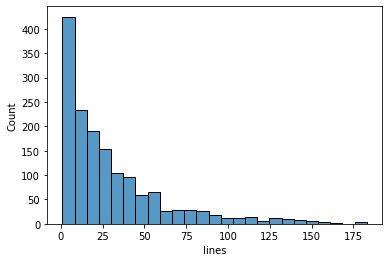

In [22]:
sns.histplot(ds9["lines"], bins=25);

In [23]:
ds9_anomalies, ds9_lower, ds9_upper = find_anomalies(ds9["lines"], 3)

Lower limit: -66.02732279
Upper limit: 126.77051346


In [24]:
len(ds9_anomalies)

39

In [25]:
print(f"{(len(ds9_anomalies) / len(ds9))*100:.3f}% of values are anomalous")

2.529% of values are anomalous


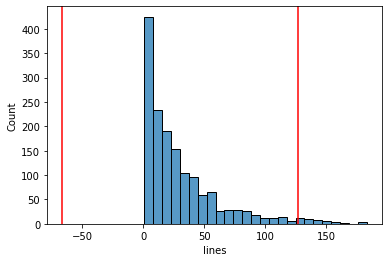

In [26]:
ax = sns.histplot(ds9["lines"], bins=25);
ax.axvline(ds9_lower, c="red"), ax.axvline(ds9_upper, c="red");

**Much more than 0.3% of the data is marked as anomalous** (2.529%), and due to the heavy right skew in the data, the lower limit does not make "sense". The "0.3%" rule therefore does not apply to this data, as it is not normally distributed. This method of anomaly detection cannot be used for this dataset.

## Dataset 2 (Regular data normal, outliers skewed)

In [27]:
# acceleration of movement during a horse riding lesson is roughly normally distributed
# data source: https://www.kaggle.com/datasets/simongbe/horse-riding-movement-patterns/
horse = pd.read_csv("data/horse.csv")

In [28]:
horse.head()

,time,acceleration,activity
0,208.421,-1.1710,unknown
1,1519.551,0.1658,walk
2,2634.841,-2.5454,unknown
3,3305.561,-3.1759,walk
4,53.091,-1.4473,unknown


In [29]:
horse.shape

(2833, 3)

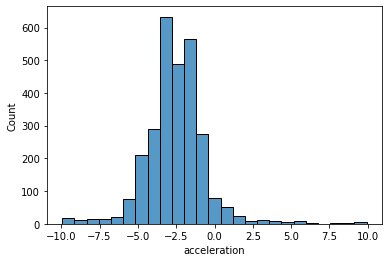

In [30]:
sns.histplot(horse["acceleration"], bins=25);

In [31]:
horse_anomalies, horse_lower, horse_upper = find_anomalies(horse["acceleration"], 3)

Lower limit: -8.41462132
Upper limit: 3.39120804


In [32]:
len(horse_anomalies)

64

(<matplotlib.lines.Line2D at 0x27a4fec75b0>,
 <matplotlib.lines.Line2D at 0x27a5005e550>)

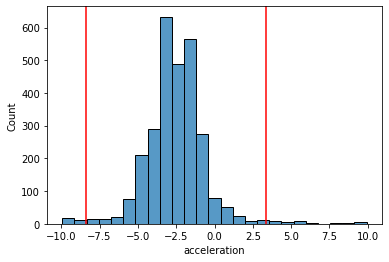

In [33]:
ax = sns.histplot(horse["acceleration"], bins=25);
ax.axvline(horse_lower, c="red"), ax.axvline(horse_upper, c="red")

In [34]:
print(f"{(len(horse_anomalies) / len(horse))*100:.3f}% of values are anomalous")

2.259% of values are anomalous


Even though the bulk of the data is randomly distributed, *the outliers are slightly right skewed. This has affected the calculation of the standard deviation, and resulted in 2.259% of the data being marked as anomalous - not 0.3%. In general, this method of anomaly detection seems to be very sensitive to the structure of the data, and only works well with data that is very nicely normally distributed - including the outliers being nicely distributed - thus is not appropriate for a lot of real world data.

## Dataset 3 (Normal)

In [35]:
# f1 lap times are roughly normally distributed
# data source: http://ergast.com/mrd/methods/qualifying/
laps = pd.read_csv("data/laps.csv")

In [36]:
laps.head()

,raceId,driverId,lap,position,time,milliseconds,seconds,log_seconds,reciprocal_seconds
0,194,75,24,15,1:34.862,94862,94.862,4.552423,0.010542
1,878,815,33,12,1:42.338,102338,102.338,4.628281,0.009772
2,882,8,13,8,1:43.216,103216,103.216,4.636824,0.009688
3,172,14,63,5,1:16.038,76038,76.038,4.331233,0.013151
4,354,1,67,4,1:14.102,74102,74.102,4.305443,0.013495


In [37]:
laps.shape

(1000, 9)

<Axes: xlabel='seconds', ylabel='Count'>

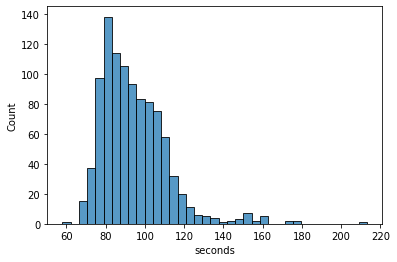

In [38]:
sns.histplot(laps["seconds"])

<Axes: xlabel='log_seconds', ylabel='Count'>

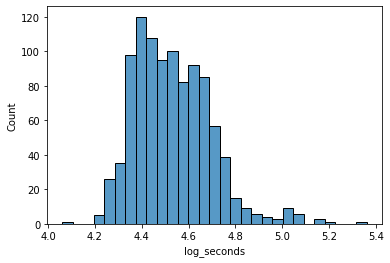

In [39]:
sns.histplot(laps["log_seconds"])

<Axes: xlabel='reciprocal_seconds', ylabel='Count'>

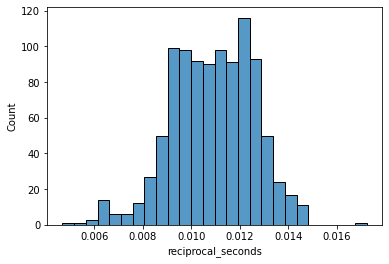

In [40]:
sns.histplot(laps["reciprocal_seconds"])

In [41]:
laps_anomalies, laps_lower, laps_upper = find_anomalies(laps["reciprocal_seconds"], 3)

Lower limit: 0.00582068
Upper limit: 0.01595721


In [42]:
len(laps_anomalies)

6

In [43]:
print(f"{(len(laps_anomalies) / len(laps))*100:.3f}% of values are anomalous")

0.600% of values are anomalous


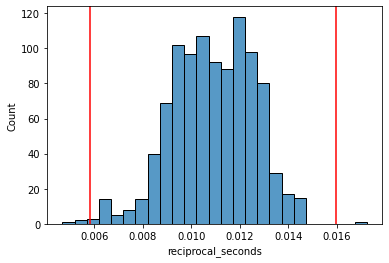

In [44]:
ax = sns.histplot(laps["reciprocal_seconds"], bins=25);
ax.axvline(laps_lower, c="red"), ax.axvline(laps_upper, c="red");

0.6% of the values are anomalous, which is closer to the expected value of 0.3% than the previous datasets were - given that this is real noisy data, I wouldn't expect a perfect adherance to the rule. In general, this method of anomaly detection is arguably appropriate for this dataset, as it captures the anomalies well, on both tails of the dataset. In general, we can say that the 0.3% rule applies, as roughly 99.7% of the data lies within 3 standard deviations of the mean.

Even with a normal distribution this method will *always* find some anomalies - 0.3% of the data - however it might not actually be an anomaly - just the data existing at the tails.

# Boxplot

In [10]:
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_whisker = q3+(iqr*1.5)
    lower_whisker = q1-(iqr*1.5)
    
    return data[(data > upper_whisker) | (data < lower_whisker)]

## Dataset 1 (Right skewed)

In [3]:
ds9 = pd.read_csv("data/ds9.csv")

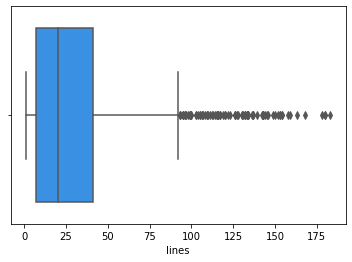

In [4]:
ax = sns.boxplot(x=ds9["lines"], color="dodgerblue");

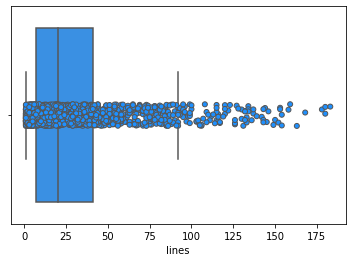

In [5]:
ax = sns.boxplot(x=ds9["lines"], showfliers=False, color="dodgerblue")
sns.stripplot(x=ds9["lines"], zorder=10, linewidth=1, jitter=0.05, color="dodgerblue", ax=ax);

**Because this dataset is highly right skewed, it has an extremely large number of outliers on the righthand side.**

In [13]:
len(find_anomalies(ds9["lines"]))

92

39 datapoints were marked as anomalies using the standard devation method. With the boxplot method, far more datapoints, 92 datapoints were marked as anomalies.

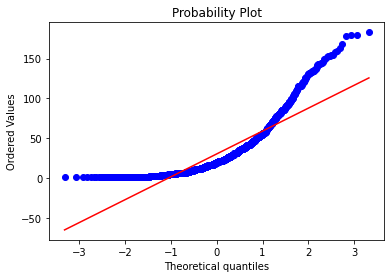

In [16]:
probplot(ds9["lines"], plot=plt);

The normal probability plot is seriously curved at the ends, indicating that the data is not at all normally distributed.

## Dataset 2 (Regular data normal, anomalies skewed)

In [17]:
horse = pd.read_csv("data/horse.csv")

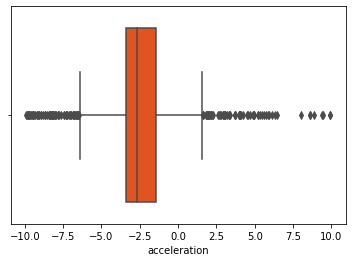

In [18]:
ax = sns.boxplot(x=horse["acceleration"], color="orangered");

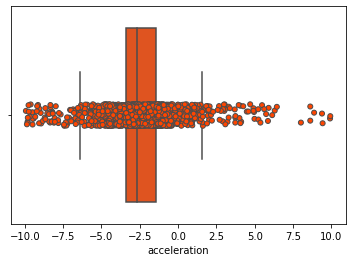

In [19]:
ax = sns.boxplot(x=horse["acceleration"], showfliers=False, color="orangered")
sns.stripplot(x=horse["acceleration"], zorder=10, linewidth=1, jitter=0.05, color="orangered", ax=ax);

The boxplot indicates that the general bulk of the data are normally distributed, but there are a very high amount of outliers at the extremes of the data.

In [20]:
len(find_anomalies(horse["acceleration"]))

136

64 datapoints were marked as anomalies using the standard devation method. With the boxplot method, a far higher number of 136 datapoints were marked as anomalies. The small interquartile range of the bulk of the data, has led to many points being marked as anomalies.

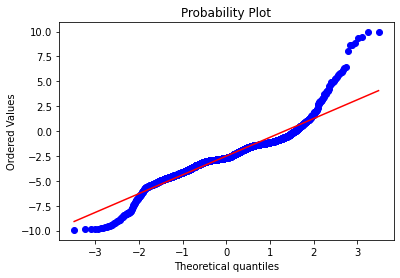

In [21]:
probplot(horse["acceleration"], plot=plt);

Although the centre of the dataset is generally normally distributed, there are a lot of outliers at the extremes of the data that are clearly not normally distributed.

## Dataset 3 (Normal)

In [22]:
laps = pd.read_csv("data/laps.csv")

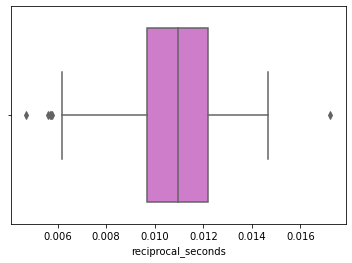

In [23]:
ax = sns.boxplot(x=laps["reciprocal_seconds"], color="orchid");

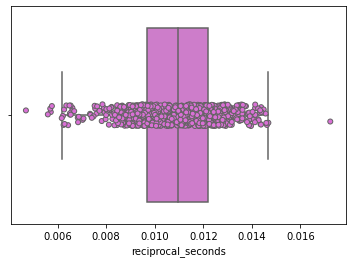

In [24]:
ax = sns.boxplot(x=laps["reciprocal_seconds"], showfliers=False, color="orchid")
sns.stripplot(x=laps["reciprocal_seconds"], zorder=10, linewidth=1, jitter=0.05, color="orchid", ax=ax);

The boxplot reflects the nice normal distribution of the data. Only a few points are marked as anomalies.

In [26]:
len(find_anomalies(laps["reciprocal_seconds"]))

6

6 datapoints were marked as anomalies using the standard deviation method. With the boxplot method 6 datapoints were also marked as anomalies. Thus when the data is very nicely normally distributed, both methods have very similar results.

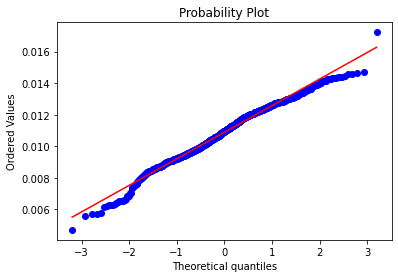

In [27]:
probplot(laps["reciprocal_seconds"], plot=plt);

The probability plot indicates that the data is nicely normally distributed. The slight deviations at the ends of the plot are within a reasonable level of variation.

# DBScan

In [248]:
def plot_distances(data):
    neighbours = NearestNeighbors(n_neighbors=2).fit(np.array(data).reshape(-1, 1))
    distances, indices = neighbours.kneighbors(np.array(data).reshape(-1, 1))
    distances = np.sort(distances, axis=0)[:,1]
    plt.plot(distances)
    plt.grid();
    
def fit_dbscan(data, min_pts, eps):
    outlier_detection = DBSCAN(min_samples=min_pts, eps=eps)
    clusters = outlier_detection.fit_predict(np.array(data).reshape(-1, 1))
    clusters[clusters != -1] = 0
    return clusters

## Hyperparameter choice:

> "If you do not have domain understanding, a rule of thumb is to derive minPts from the number of dimensions D in the data set. minPts >= D + 1. For 2D data, take minPts = 4. For larger datasets, with much noise, it suggested to go with minPts = 2 * D"  

*Pratik Nabriya (https://stats.stackexchange.com/users/261369/pratik-nabriya), A routine to choose eps and minPts for DBSCAN, URL (version: 2020-07-23): https://stats.stackexchange.com/q/478681*

> "We find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon."

*https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc*

> "ε has to be estimated. As rule of thumb, ε can be guessed as approx. 3 times the stdev of the data."

## Dataset 1 (Right skewed)

In [63]:
ds9 = pd.read_csv("data/ds9.csv")

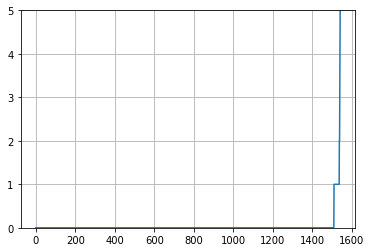

In [291]:
plot_distances(ds9["lines"])
plt.ylim([0, 5]);

In [341]:
ds9_clusters = fit_dbscan(ds9["lines"], min_pts=2, eps=0.5)

In [342]:
list(ds9_clusters).count(-1)

32

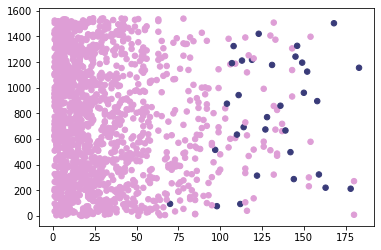

In [343]:
plt.scatter(ds9["lines"], list(ds9["lines"].index), c=ds9_clusters, cmap="tab20b", s=30);

In [350]:
ds9_clusters = fit_dbscan(ds9["lines"], min_pts=2, eps=1)

In [351]:
list(ds9_clusters).count(-1)

5

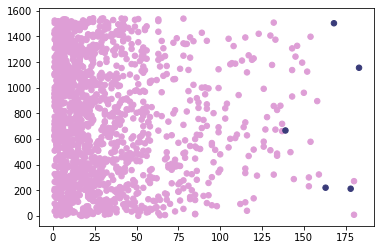

In [352]:
plt.scatter(ds9["lines"], list(ds9["lines"].index), c=ds9_clusters, cmap="tab20b", s=30);

**The points chosen to be anomalies are very sensitive to the hyperparameters.**

In general, DBScan only finds anomalies that are totally on their own - if there are a few anomalies that are grouped together, there are defined as a "cluster", and aren’t recognised as an anomaly - therefore this method is not so appropriate for this long tailed dataset.

## Dataset 2 (Regular data normal, anomalies skewed)

In [240]:
horse = pd.read_csv("data/horse.csv")

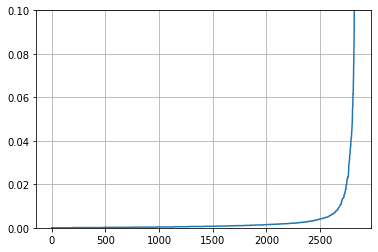

In [262]:
plot_distances(horse["acceleration"])
plt.ylim([0, 0.1]);

In [263]:
horse_clusters = fit_dbscan(horse["acceleration"], min_pts=2, eps=0.01)

In [264]:
list(horse_clusters).count(-1)

154

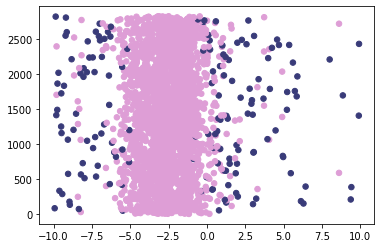

In [265]:
plt.scatter(horse["acceleration"], list(horse["acceleration"].index), c=horse_clusters, cmap="tab20b", s=30);

In [266]:
horse["acceleration"].std()

1.9679855895643092

In [301]:
horse_clusters = fit_dbscan(horse["acceleration"], min_pts=3, eps=0.1)

In [302]:
list(horse_clusters).count(-1)

27

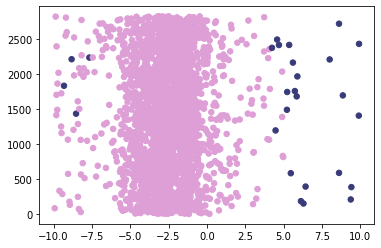

In [303]:
plt.scatter(horse["acceleration"], list(horse["acceleration"].index), c=horse_clusters, cmap="tab20b", s=30);

Once again, DBScan only finds anomalies that are totally on their own. In this dataset, **the group of extreme values on the left side are grouped more closely together, so form their own cluster** (as can be seen below), and are not identified as anomalies. The points on the right side are more spread out, and are thus identified as anomalies.

However, you could identify anomalies, as all of those points that don't belong to the main large cluster in the centre.

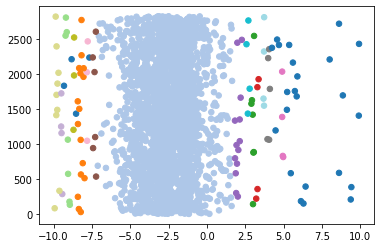

In [354]:
horse_outlier_detection = DBSCAN(min_samples=3, eps=0.1)
horse_clusters = horse_outlier_detection.fit_predict(np.array(horse["acceleration"]).reshape(-1, 1))
plt.scatter(horse["acceleration"], list(horse["acceleration"].index), c=horse_clusters, cmap="tab20", s=30);

## Dataset 3 (Normal)

In [246]:
laps = pd.read_csv("data/laps.csv")
# scaling up the variable to make it more readable
laps["reciprocal_seconds_100"] = laps["reciprocal_seconds"]*100

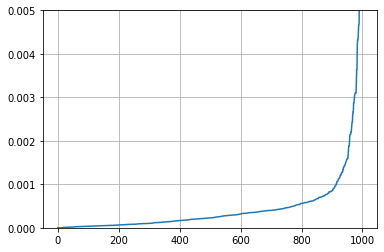

In [247]:
plot_distances(laps["reciprocal_seconds_100"])
plt.ylim([0, 0.005]);

In [250]:
laps_clusters = fit_dbscan(laps["reciprocal_seconds_100"], min_pts=2, eps=0.002)

In [251]:
list(laps_clusters).count(-1)

42

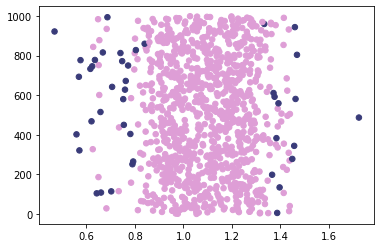

In [252]:
plt.scatter(laps["reciprocal_seconds_100"], list(laps["reciprocal_seconds_100"].index), c=laps_clusters, cmap="tab20b", s=30);

In [253]:
laps["reciprocal_seconds_100"].std()

0.16902661543715528

In [304]:
laps_clusters = fit_dbscan(laps["reciprocal_seconds_100"], min_pts=3, eps=0.05)

In [305]:
list(laps_clusters).count(-1)

2

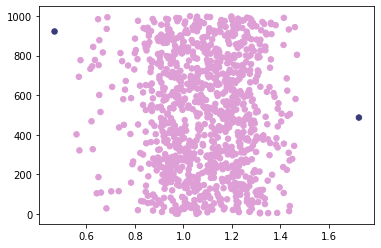

In [306]:
plt.scatter(laps["reciprocal_seconds_100"], list(laps["reciprocal_seconds_100"].index), c=laps_clusters, cmap="tab20b", s=30);

This dataset has a few points that are very isolated from the rest of the data, and thus with the correct choice of hyperparameters, can be easily identified as anomalies.

# Isolation Forest

In [99]:
def find_iso_forest(data):
    iso_forest = IsolationForest().fit(np.array(data).reshape(-1, 1))
    space = np.linspace(data.min(), data.max(), 200).reshape(-1,1)
    anomaly_score = iso_forest.decision_function(space)
    anomaly_labels = iso_forest.predict(space)
    plt.fill_between(space.T[0], 
                     np.min(anomaly_score), 
                     np.max(anomaly_score), 
                     where=anomaly_labels==-1, 
                     color='#FF00FF', 
                     alpha=.4, 
                     label="Outlier region")
    plt.plot(space, anomaly_score, label="Anomaly score")
    plt.axhline(y=0, color = "r", linestyle = '-') 
    plt.title("Anomaly Scores")
    print("Number of anomalies:", sum(anomaly_labels==-1)) 

def anomalies_on_data(data):
    iso_forest = IsolationForest().fit(np.array(data).reshape(-1, 1))
    space = np.linspace(data.min(), data.max(), 200).reshape(-1,1)
    anomaly_score = iso_forest.decision_function(space)
    anomaly_labels = iso_forest.predict(space)
    y, x, _ = plt.hist(data, edgecolor="black", bins=25)
    plt.fill_between(space.T[0], 
                     np.min(0), 
                     np.max(y.max()), 
                     where=anomaly_labels==-1, 
                     color='#FF00FF', 
                     alpha=.4, 
                     label="Outlier region")
    plt.title("Anomalous Region on Original Data")

## Dataset 1 (Right skewed)

In [100]:
ds9 = pd.read_csv("data/ds9.csv")

Number of anomalies: 152


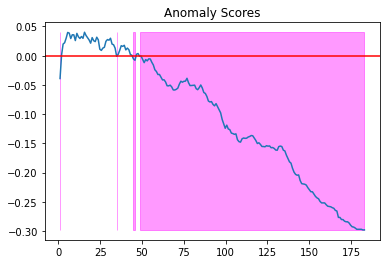

In [101]:
find_iso_forest(ds9["lines"])

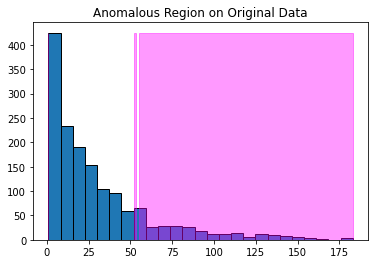

In [102]:
anomalies_on_data(ds9["lines"])

## Dataset 2 (Regular data normal, anomalies skewed)

In [103]:
horse = pd.read_csv("data/horse.csv")

Number of anomalies: 156


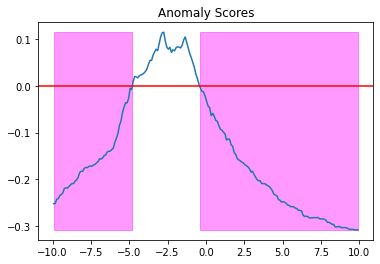

In [104]:
find_iso_forest(horse["acceleration"])

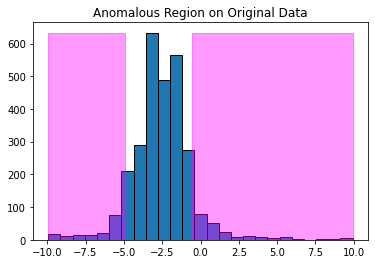

In [105]:
anomalies_on_data(horse["acceleration"])

## Dataset 3 (Normal)

In [106]:
laps = pd.read_csv("data/laps.csv")

Number of anomalies: 130


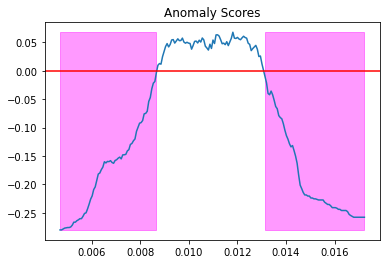

In [107]:
find_iso_forest(laps["reciprocal_seconds"])

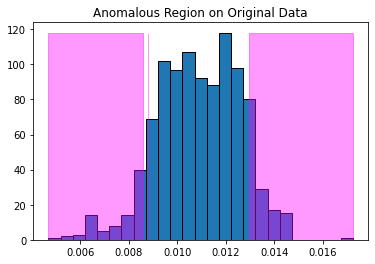

In [108]:
anomalies_on_data(laps["reciprocal_seconds"])

For all three datasets, a very large number of points are identified as anomalous, on the extremes of the data distributions.  
**This method works best when the anomalies are a minority and are very different to the rest of the regular data - however in my datasets neither of these criteria are true, resulting in this method not working so well.**

# Robust Random Cut Forest

In [227]:
def apply_rrcf(data):
    
    data = data = np.array(data, dtype=np.float64).reshape(-1, 1)
    
    num_trees = 100
    tree_size = 256
    n = len(data)

    forest = []
    np.random.seed(45)
    while len(forest) < num_trees:
        # size of the data/tree size=trees, e.g. 1542/256≈6. So we can make 6 trees on each loop, each with unique bootstrapped data
        sampled_points = np.random.choice(n, size=(n // tree_size, tree_size), replace=False)
        trees = [rrcf.RCTree(data[point], index_labels=point) for point in sampled_points]
        forest.extend(trees)

    codisps = pd.Series([] for _ in range(n))
    for tree in forest:
        # find the codisp value for each point (leaf) in a tree
        for point in tree.leaves:
            codisps[point].append(tree.codisp(point))
            
    # find the average codisp value for that point across all trees
    avg_codisps = codisps.apply(np.mean)
    
    return avg_codisps

## Dataset 1 (Right skewed)

In [243]:
ds9 = pd.read_csv("data/ds9.csv")

In [244]:
ds9_codisps = apply_rrcf(ds9["lines"])

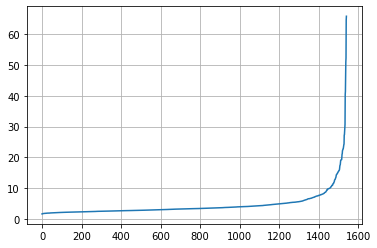

In [245]:
plt.plot(np.array(ds9_codisps.sort_values()))
plt.grid();

In [264]:
ds9_codisps.std()*3

14.00736716417946

Standard deviation method:

In [251]:
len(ds9_codisps[ds9_codisps > 15].sort_values())

44

Threshold test:

In [255]:
len(ds9_codisps[ds9_codisps > ds9_codisps.quantile(0.95)])

78

In [254]:
len(ds9_codisps[ds9_codisps > ds9_codisps.quantile(0.99)])

16

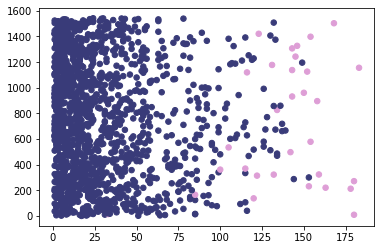

In [272]:
plt.scatter(ds9["lines"], list(ds9["lines"].index), c=ds9_codisps > ds9_codisps.quantile(0.98), cmap="tab20b", s=30);

This method identified the points in the right tail of the distribution - however as the data is heavily skewed, it is arguable whether these are really anomalous points.

## Dataset 2 (Regular data normal, anomalies skewed)

In [259]:
horse = pd.read_csv("data/horse.csv")

In [260]:
horse_codisps = apply_rrcf(horse["acceleration"])

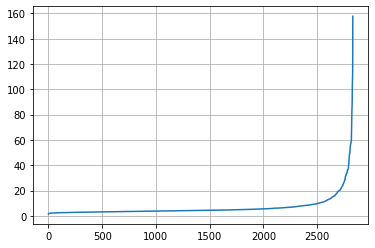

In [261]:
plt.plot(np.array(horse_codisps.sort_values()))
plt.grid();

In [265]:
horse_codisps.std()*3

27.330893301130565

In [266]:
len(horse_codisps[horse_codisps > 25].sort_values())

91

In [267]:
len(horse_codisps[horse_codisps > horse_codisps.quantile(0.95)])

142

In [268]:
len(horse_codisps[horse_codisps > horse_codisps.quantile(0.99)])

29

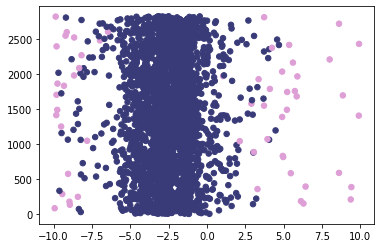

In [273]:
plt.scatter(horse["acceleration"], list(horse["acceleration"].index), c=horse_codisps > horse_codisps.quantile(0.98), cmap="tab20b", s=30);

This method was able to quite well detect the extreme points on both sides of the distribution.

## Dataset 3 (Normal)

In [274]:
laps = pd.read_csv("data/laps.csv")

In [275]:
laps_codisps = apply_rrcf(laps["reciprocal_seconds"])

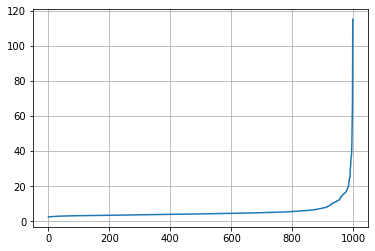

In [276]:
plt.plot(np.array(laps_codisps.sort_values()))
plt.grid();

In [277]:
laps_codisps.std()*3

17.125972378809358

In [278]:
len(laps_codisps[laps_codisps > 17].sort_values())

22

In [280]:
len(laps_codisps[laps_codisps > laps_codisps.quantile(0.95)])

50

In [281]:
len(laps_codisps[laps_codisps > laps_codisps.quantile(0.99)])

10

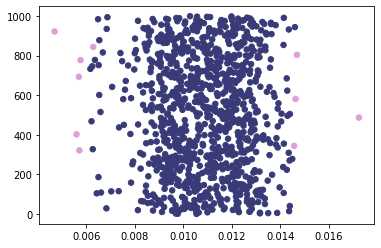

In [287]:
plt.scatter(laps["reciprocal_seconds"], list(laps["reciprocal_seconds"].index), c=laps_codisps > laps_codisps.quantile(0.99), cmap="tab20b", s=30);

This method is well capable of identifying the anomalous points, for this nicely normal distribution, as long as the percentile is set high enough.